In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('pokemon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
to_remove = ['Generation', 'Legendary']
df = df.drop(columns=to_remove)

In [7]:
df[df['id'] == 63]

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
62,63,NaN,Fighting,NaN,65,105,60,60,70,95


In [8]:
df.loc[df['id'] == 63, 'Name'] = 'Primeape'
df[60:65]

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
60,61,Golduck,Water,NaN,80,82,78,95,80,85
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95


In [9]:
df['Type 2'].fillna('No_Type', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       800 non-null    int64 
 1   Name     800 non-null    object
 2   Type 1   800 non-null    object
 3   Type 2   800 non-null    object
 4   HP       800 non-null    int64 
 5   Attack   800 non-null    int64 
 6   Defense  800 non-null    int64 
 7   Sp. Atk  800 non-null    int64 
 8   Sp. Def  800 non-null    int64 
 9   Speed    800 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 62.6+ KB


C:\Users\felip\AppData\Local\Temp\ipykernel_24492\2760094619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna('No_Type', inplace=True)


In [10]:
df['Total Stats'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df['Avg. Stats'] = (df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']) / 6
df.head()

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Stats,Avg. Stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.500000
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.500000
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,104.166667
4,5,Charmander,Fire,No_Type,39,52,43,60,50,65,309,51.500000


In [11]:
def getPokemonTeam(pokemonList: list[str]) -> pd.DataFrame:
    return df[
        (df['Name'] == pokemonList[0]) |
        (df['Name'] == pokemonList[1]) |
        (df['Name'] == pokemonList[2]) |
        (df['Name'] == pokemonList[3]) |
        (df['Name'] == pokemonList[4]) |
        (df['Name'] == pokemonList[5]) 
    ]

In [12]:
ash_kanto = getPokemonTeam(['Pikachu', 'Squirtle', 'Bulbasaur', 'Charizard', 'Kingler', 'Muk'])
ash_orange = getPokemonTeam(['Pikachu', 'Squirtle', 'Bulbasaur', 'Charizard', 'Lapras', 'Tauros'])
ash_johto = getPokemonTeam(['Pikachu', 'Totodile', 'Snorlax', 'Noctowl', 'Bayleef', 'Charizard'])
ash_hoenn = getPokemonTeam(['Pikachu', 'Grovyle', 'Sweallow', 'Corphish', 'Torkoal', 'Glalie'])
ash_sinnoh = getPokemonTeam(['Pikachu', 'Torterra', 'Infernape', 'Gliscor', 'Staraptor', 'Gible'])
ash_unova = getPokemonTeam(['Pikachu', 'Oshawott', 'Pignite', 'Snivy', 'Krookodile', 'Boldore'])
ash_kalos = getPokemonTeam(['Pikachu', 'Talonflame', 'Greninja', 'Goodra', 'Hawlucha', 'Noivern'])

In [13]:
ash_kanto

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Stats,Avg. Stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.000000
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,534,89.000000
9,10,Squirtle,Water,No_Type,44,48,65,50,64,43,314,52.333333
30,31,Pikachu,Electric,No_Type,35,55,40,50,50,90,320,53.333333
96,97,Muk,Poison,No_Type,105,105,75,65,100,50,500,83.333333
107,108,Kingler,Water,No_Type,55,130,115,50,50,75,475,79.166667


In [14]:
ash_kalos

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Stats,Avg. Stats
30,31,Pikachu,Electric,No_Type,35,55,40,50,50,90,320,53.333333
726,727,Greninja,Water,Dark,72,95,67,103,71,122,530,88.333333
731,732,Talonflame,Fire,Flying,78,81,71,74,69,126,499,83.166667
771,772,Hawlucha,Fighting,Flying,78,92,75,74,63,118,500,83.333333
776,777,Goodra,Dragon,No_Type,90,100,70,110,150,80,600,100.000000
791,792,Noivern,Flying,Dragon,85,70,80,97,80,123,535,89.166667


In [15]:
import plotly.express as px

def showStatsRadar(team: pd.DataFrame, title):
    df = pd.DataFrame(dict(
    r=[team['HP'].sum(), team['Attack'].sum(), team['Defense'].sum(),
       team['Sp. Atk'].sum(), team['Sp. Def'].sum(), team['Speed'].sum()],
    theta=['HP','Attack','Defense',
           'Sp. Atk', 'Sp. Def', 'Speed']))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True, title=title)
    fig.update_traces(fill='toself')
    fig.show()

In [16]:
showStatsRadar(ash_kanto, title='Ash Kanto Team Stats')
showStatsRadar(ash_orange, title='Ash Orange Islands Team Stats')
showStatsRadar(ash_johto, title='Ash Johto Team Stats')
showStatsRadar(ash_hoenn, title='Ash Hoenn Team Stats')
showStatsRadar(ash_sinnoh, title='Ash Sinnoh Team Stats')
showStatsRadar(ash_unova, title='Ash Unova Team Stats')
showStatsRadar(ash_kalos, title='Ash Kalos Team Stats')

In [17]:
kanto_champ = getPokemonTeam(['Pidgeot', 'Alakazam', 'Rhydon', 'Exeggutor', 'Gyarados', 'Charizard'])
johto_champ = getPokemonTeam(['Dragonite', 'Altaria', 'Salamence', 'Garchomp', 'Gyarados', 'Charizard'])
hoenn_champ = getPokemonTeam(['Skarmory', 'Metagross', 'Aggron', 'Cradily', 'Armaldo', 'Metagross'])

In [18]:
import random as rnd

In [19]:
combats = pd.read_csv('combats.csv')
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [20]:
combats = combats.merge(df, how='left', left_on='First_pokemon', right_on='id', suffixes=('', '_first'))

combats = combats.merge(df, left_on='Second_pokemon', right_on='id', how='left', suffixes=('_first', '_second'))

for feature in ['Total Stats', 'Avg. Stats', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    combats[f'{feature}_diff'] = combats[f'{feature}_first'] - combats[f'{feature}_second']

combats_pkmn = combats[[
    'First_pokemon', 'Second_pokemon', 'Winner', 'Type 1_first', 'Type 2_first', 'Type 1_second',
    'HP_diff', 'Attack_diff', 'Defense_diff', 'Sp. Atk_diff', 'Sp. Def_diff', 'Speed_diff',
                        'Type 2_second', 'Total Stats_diff', 'Avg. Stats_diff']]

combats_pkmn.head()

,First_pokemon,Second_pokemon,Winner,Type 1_first,Type 2_first,Type 1_second,HP_diff,Attack_diff,Defense_diff,Sp. Atk_diff,Sp. Def_diff,Speed_diff,Type 2_second,Total Stats_diff,Avg. Stats_diff
0,266,298,298,Rock,Ground,Grass,-20,-6,10,-15,10,-19,Dark,-40,-6.666667
1,702,701,701,Grass,Fighting,Rock,0,-39,-18,18,39,0,Fighting,0,0.000000
2,191,668,668,Fairy,Flying,Psychic,-20,-35,10,-45,10,0,No_Type,-80,-13.333333
3,237,683,683,Fire,No_Type,Dragon,-37,-80,-50,10,-50,-28,No_Type,-235,-39.166667
4,151,231,151,Rock,Water,Bug,50,50,-105,105,-160,50,Rock,-10,-1.666667


In [21]:
def getCombatPokemonTeam(pokemonList: list[str]) -> pd.DataFrame:
    return combats_pkmn[
        ((combats_pkmn['First_pokemon'] == pokemonList[0]) | (combats_pkmn['Second_pokemon'] == pokemonList[0])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[1]) | (combats_pkmn['Second_pokemon'] == pokemonList[1])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[2]) | (combats_pkmn['Second_pokemon'] == pokemonList[2])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[3]) | (combats_pkmn['Second_pokemon'] == pokemonList[3])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[4]) | (combats_pkmn['Second_pokemon'] == pokemonList[4])) |
        ((combats_pkmn['First_pokemon'] == pokemonList[5]) | (combats_pkmn['Second_pokemon'] == pokemonList[5])) 
    ]

In [22]:
ash_kanto_combat = getCombatPokemonTeam(ash_kanto.id.values)
ash_orange_combat = getCombatPokemonTeam(ash_orange.id.values)
ash_johto_combat = getCombatPokemonTeam(ash_johto.id.values)
# ash_hoenn_combat = getCombatPokemonTeam(ash_hoenn.id.values)
ash_sinnoh_combat = getCombatPokemonTeam(ash_sinnoh.id.values)
ash_unova_combat = getCombatPokemonTeam(ash_unova.id.values)
ash_kalos_combat = getCombatPokemonTeam(ash_kalos.id.values)

In [23]:
print(len(ash_kanto_combat.values))
print(len(ash_johto_combat.values))
print(len(ash_sinnoh_combat.values))
print(len(ash_unova_combat.values))
print(len(ash_kalos_combat.values))

760
762
798
776
736


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from collections import Counter

X = combats[['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp. Atk_diff', 'Sp. Def_diff', 'Speed_diff', 'Total Stats_diff', 'Avg. Stats_diff']]
y = combats['Winner']

y = combats.apply(lambda row: 1 if row['Winner'] == row['First_pokemon'] else 0, axis=1)

print("Class distribution in target variable:", Counter(y))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy: float = accuracy_score(y_test, y_pred)
precision: float = precision_score(y_test, y_pred, zero_division=1)
recall: float = recall_score(y_test, y_pred, zero_division=1)
f1: float = f1_score(y_test, y_pred, zero_division=1)
roc_auc: float = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100}')
print(f'Precision: {precision * 100}')
print(f'Recall: {recall * 100}')
print(f'F1 Score: {f1 * 100}')
print(f'ROC AUC Score: {roc_auc * 100}')

Class distribution in target variable: Counter({0: 26399, 1: 23601})
Accuracy: 95.0
Precision: 94.20078985657867
Recall: 95.3503050704818
F1 Score: 94.77206189878711
ROC AUC Score: 95.01649044261654


In [25]:
print(ash_kanto.id.values)
print(ash_orange.id.values)
print(ash_johto.id.values)
print(ash_sinnoh.id.values)
print(ash_unova.id.values)
print(ash_kalos.id.values)

[  1   7  10  31  97 108]
[  1   7  10  31 139 143]
[  7  31 156 168 173 179]
[ 31 435 438 444 492 524]
[ 31 555 559 561 585 614]
[ 31 727 732 772 777 792]


In [26]:
def randomizeTeams(ash_team, champ_team, champion_name:str=str()) -> list:
    rnd.shuffle(ash_team)
    rnd.shuffle(champ_team)
    battle = pd.DataFrame({'Ash Team': ash_team, 'Champion Team': champ_team})
    
    battle = battle.merge(df, how='left', left_on='Ash Team', right_on='id', suffixes=('', '_first'))

    battle = battle.merge(df, left_on='Champion Team', right_on='id', how='left', suffixes=('_first', '_second'))

    for feature in ['Total Stats', 'Avg. Stats', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
        battle[f'{feature}_diff'] = battle[f'{feature}_first'] - battle[f'{feature}_second']
    
    X_test_final = scaler.transform(battle[[
        'HP_diff', 'Attack_diff', 'Defense_diff', 'Sp. Atk_diff', 'Sp. Def_diff', 'Speed_diff',
        'Total Stats_diff', 'Avg. Stats_diff'
        ]])

    battle['Prediction'] = model.predict(X_test_final)

    battle['Winning_Pokemon'] = battle.apply(lambda row: row['Ash Team'] if row['Prediction'] == 1 else row['Champion Team'], axis=1)

    set_ash = set(battle['Ash Team'].values)
    set_champ = set(battle['Champion Team'].values)
    set_winning = set(battle['Winning_Pokemon'].values)


    winner = ''

    if len(set_ash.intersection(set_winning)) > len(set_champ.intersection(set_winning)):
        winner = 'Ash'
    else:
        winner = champion_name

    return [battle[['Ash Team', 'Champion Team', 'Winning_Pokemon']], winner]

In [27]:
df_res, winner = randomizeTeams(ash_team=ash_kanto.id.values, champ_team=[18, 65, 112, 103, 130, 6], champion_name='Blue')
print(winner)

Blue


In [28]:
def checkWinners(ash_team, champ_team, times=1000, title:str=str(), champion_name:str=str()):
    winners = []

    for _ in range(0, times):
        _, winner = randomizeTeams(ash_team=ash_team, champ_team=champ_team, champion_name=champion_name)
        winners.append(winner)

    plt.title(title)
    plt.ylabel('Wins')
    sn.histplot(data=winners)

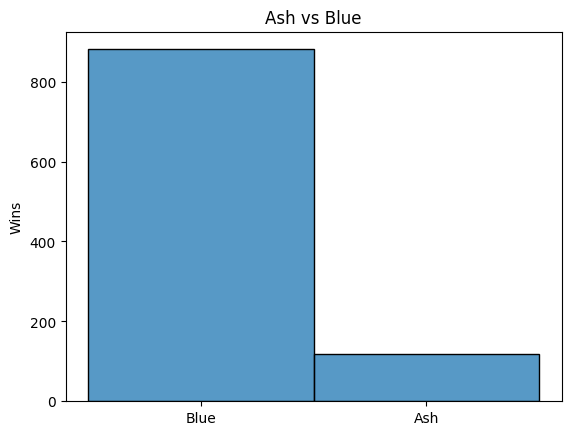

In [29]:
checkWinners(ash_team=ash_kanto.id.values, champ_team=[18, 65, 112, 103, 130, 6], title='Ash vs Blue', champion_name='Blue')

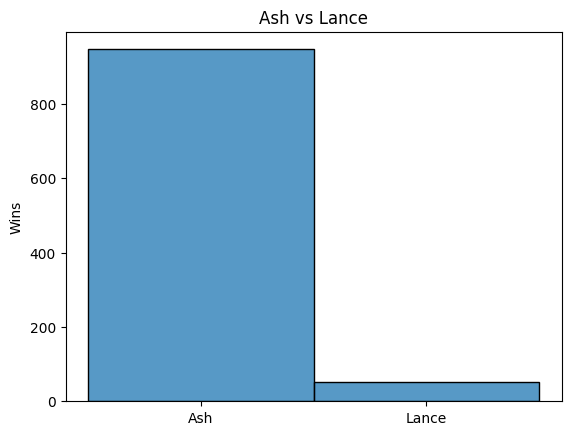

In [30]:
checkWinners(ash_team=ash_orange.id.values, champ_team=[130, 149, 149, 149, 142, 6], title='Ash vs Lance', champion_name='Lance')

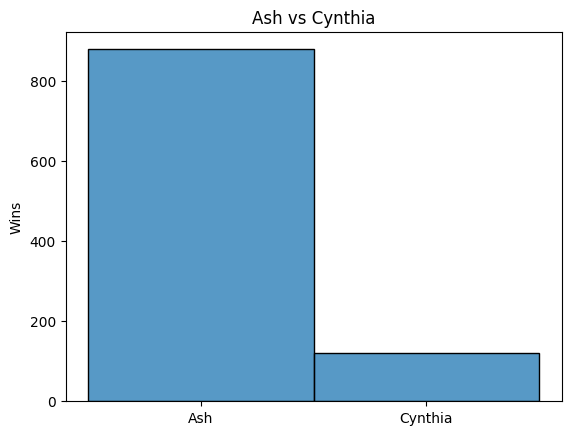

In [31]:
checkWinners(ash_team=ash_sinnoh.id.values, champ_team=[442, 407, 350, 448, 468, 445], title='Ash vs Cynthia', champion_name='Cynthia')

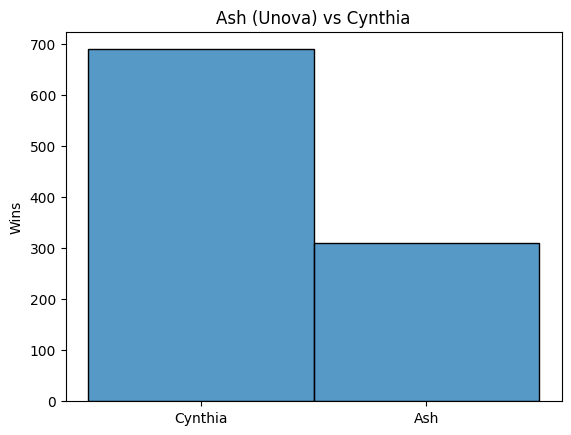

In [32]:
checkWinners(ash_team=ash_unova.id.values, champ_team=[442, 407, 350, 448, 468, 445], title='Ash (Unova) vs Cynthia', champion_name='Cynthia')